In [12]:
%matplotlib inline
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import community as community_louvain
import random
import time
import seaborn as sns
from colour import Color
random.seed(1234)

text = []
title_one = "avengers-endgame.txt"
with open(title_one, "r", encoding='utf-8') as file:
	text = file.read()
       
text = text.replace("INT.","EXT.")
scenes = text.split("EXT.")
scenes.pop(0)

title_two = "characters.txt"

with open(title_two, "r", encoding = "utf-8") as file_two:
    text_two = file_two.read()

characters = text_two.split("\n")

characters_up = []
for i in characters:
    if i != '':
        characters_up.append(i.upper())

interact_data = pd.DataFrame(index = characters_up, columns = characters_up, data = 0)

all_charac_in_scene = []
for n in scenes:
    characters_in_scene = []
    for charac in characters_up:
        x = n.find(charac)
        if x != -1:
            characters_in_scene.append(charac)
    all_charac_in_scene.append(characters_in_scene)

print(all_charac_in_scene)


G = nx.Graph()


[['CLINT BARTON', 'LAURA BARTON'], [], ['TONY', 'NEBULA'], ['TONY'], ['TONY'], ['TONY', 'NEBULA'], ['TONY', 'NEBULA'], ['TONY'], ['TONY'], ['TONY'], ['TONY', 'CAROL DANVERS', 'NEBULA'], ['STEVE'], ['STEVE', 'TONY', 'BRUCE BANNER', 'NATASHA', 'CAROL DANVERS', 'ROCKET', 'NEBULA', 'PEPPER POTTS'], ['STEVE', 'TONY', 'THOR', 'NATASHA', 'RHODEY', 'CAROL DANVERS', 'SCOTT LANG', 'ROCKET', 'WONG', 'SECRETARY ROSS', 'T’CHALLA', 'DR. STRANGE', 'PETER PARKER', 'SAM WILSON', 'DRAX', 'MANTIS', 'GROOT', 'HOPE VAN DYNE', 'HANK PYM', 'NICK FURY', 'MARIA HILL', 'JANE FOSTER'], ['STEVE', 'TONY', 'NATASHA', 'RHODEY', 'CAROL DANVERS'], ['STEVE', 'NATASHA', 'RHODEY', 'CAROL DANVERS', 'NEBULA'], ['STEVE', 'THOR', 'BRUCE BANNER', 'NATASHA', 'RHODEY', 'CAROL DANVERS', 'ROCKET', 'NEBULA'], ['STEVE', 'NATASHA', 'RHODEY', 'CAROL DANVERS', 'ROCKET', 'NEBULA'], [], ['CAROL DANVERS'], ['STEVE', 'NATASHA', 'CAROL DANVERS', 'NEBULA'], [], ['STEVE', 'THOR', 'BRUCE BANNER', 'NATASHA', 'RHODEY', 'CAROL DANVERS', 'ROCKET'

In [13]:
interact_data.head()

,STEVE,TONY,THOR,BRUCE BANNER,NATASHA,CLINT BARTON,RHODEY,CAROL DANVERS,SCOTT LANG,ROCKET,...,CULL OBSIDIAN,CORVUS GLAIVE,RED SKULL,BROCK RUMLOW,ALEXANDER PIERCE,HOWARD STARK,PEGGY CARTER,JARVIS,STAN LEE,THANOS
STEVE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TONY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
THOR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BRUCE BANNER,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NATASHA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
for lst in all_charac_in_scene :
    for char in lst :
        i = 1
        while i < len(lst)-lst.index(char):
            char2 = lst[lst.index(char)+i]
            interact_data.at[char,char2] += 1
            i+=1

In [15]:
interact_data.head()

,STEVE,TONY,THOR,BRUCE BANNER,NATASHA,CLINT BARTON,RHODEY,CAROL DANVERS,SCOTT LANG,ROCKET,...,CULL OBSIDIAN,CORVUS GLAIVE,RED SKULL,BROCK RUMLOW,ALEXANDER PIERCE,HOWARD STARK,PEGGY CARTER,JARVIS,STAN LEE,THANOS
STEVE,0,29,19,3,19,7,18,12,15,16,...,1,1,0,2,0,1,2,1,0,8
TONY,0,0,20,1,11,8,11,6,13,12,...,1,1,0,1,2,4,1,1,1,8
THOR,0,0,0,3,9,6,15,5,9,20,...,1,0,0,1,2,0,0,0,0,9
BRUCE BANNER,0,0,0,0,4,0,3,3,0,3,...,0,0,0,0,0,0,0,0,0,2
NATASHA,0,0,0,0,0,11,12,9,11,10,...,0,0,2,1,0,0,0,0,0,3


In [16]:
G.add_nodes_from(characters_up)

for char1 in characters_up:
    for char2 in characters_up:
        weight = interact_data.at[char1, char2]
        if weight != 0 and char1 != '' and char2 != '':
            G.add_edges_from([(char1, char2, {"weight" : weight})])

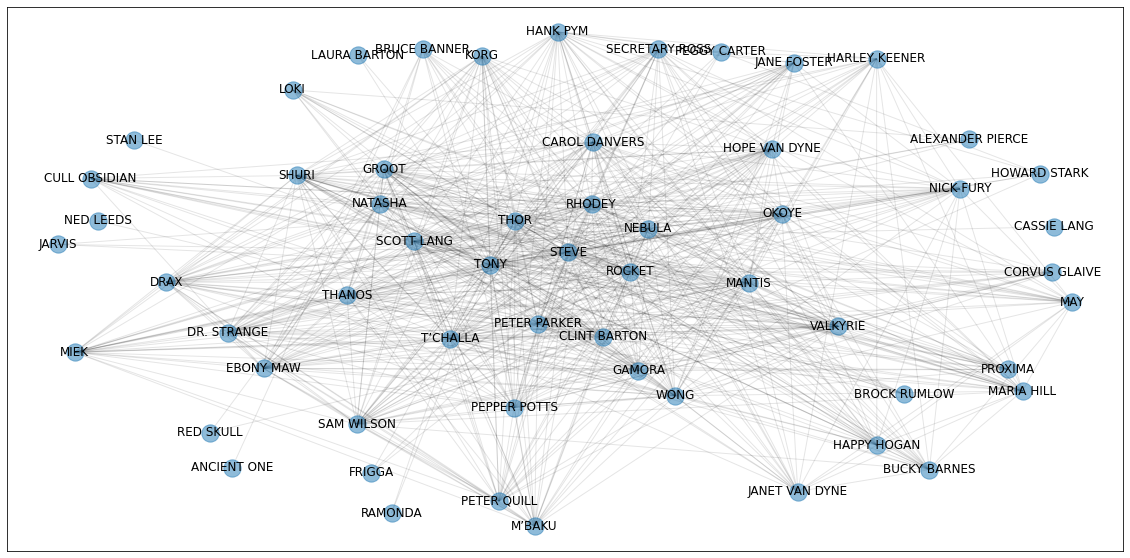

In [35]:
plt.figure(figsize= (20,10))
pos = nx.spring_layout(G, seed=4321, k=3)
nx.draw_networkx_edges(G, pos, alpha=0.1)
nx.draw_networkx_nodes(G, pos,alpha = 0.5)
nx.draw_networkx_labels(G, pos)
plt.savefig("network_display.png")

In [17]:
G.nodes()

NodeView(('STEVE', 'TONY', 'THOR', 'BRUCE BANNER', 'NATASHA', 'CLINT BARTON', 'RHODEY', 'CAROL DANVERS', 'SCOTT LANG', 'ROCKET', 'NEBULA', 'VALKYRIE', 'KORG', 'MIEK', 'WONG', 'OKOYE', 'RAMONDA', 'M’BAKU', 'CASSIE LANG', 'MAY', 'PEPPER POTTS', 'HAPPY HOGAN', 'SECRETARY ROSS', 'HARLEY KEENER', 'T’CHALLA', 'SHURI', 'DR. STRANGE', 'PETER PARKER', 'NED LEEDS', 'BUCKY BARNES', 'SAM WILSON', 'PETER QUILL', 'DRAX', 'MANTIS', 'GROOT', 'HOPE VAN DYNE', 'JANET VAN DYNE', 'HANK PYM', 'NICK FURY', 'MARIA HILL', 'LAURA BARTON', 'ANCIENT ONE', 'GAMORA', 'LOKI', 'FRIGGA', 'JANE FOSTER', 'EBONY MAW', 'PROXIMA', 'CULL OBSIDIAN', 'CORVUS GLAIVE', 'RED SKULL', 'BROCK RUMLOW', 'ALEXANDER PIERCE', 'HOWARD STARK', 'PEGGY CARTER', 'JARVIS', 'STAN LEE', 'THANOS'))

In [18]:
# Compute the degree assortativity of the network using networkx tools
r = nx.degree_assortativity_coefficient(G)
print(f"The assortativity of the graph is: {r:3.1f}")

The assortativity of the graph is: -0.2


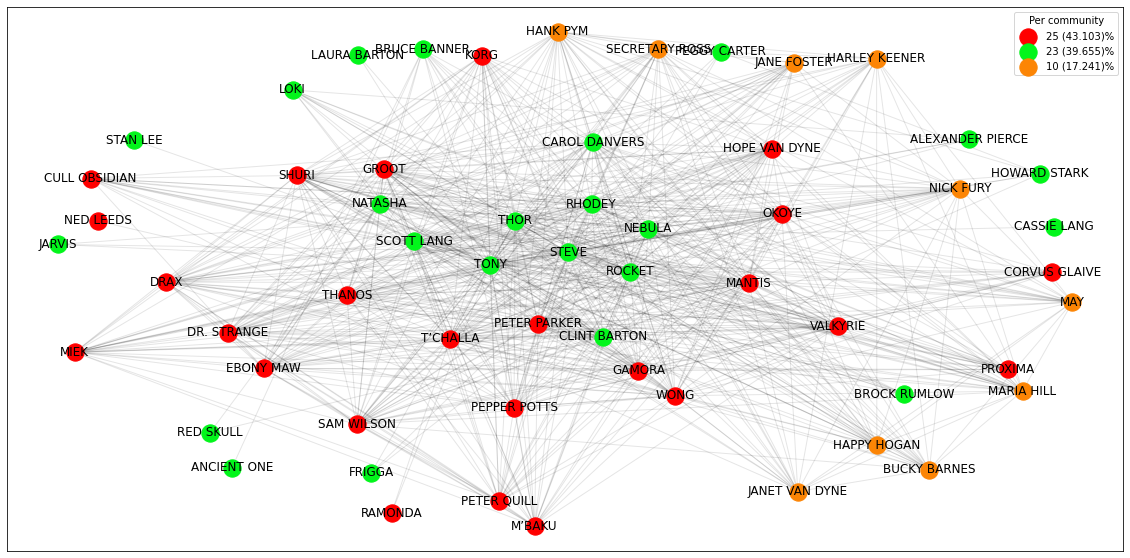

In [19]:
# Perform community detection using Louvain algorithm
# more: https://github.com/taynaud/python-louvain

# compute the best partition
def communities_detection(graph):
    partition = community_louvain.best_partition(graph)
    pos = nx.spring_layout(graph, seed=4321, k=3)

    fig = plt.figure(figsize=(20, 10))
    communities_colors = ["#ff0000", "#02f51b", "#fc8505", "#d3fc05", "#00a1f2", "#ce00f2", "#6a5d7a", "#113832", "#421408"]

    nb_communities = max(partition.values()) +1
    for i in range(nb_communities):
        nb_community = 0
        for key, value in partition.items():
            if value == i:
                nb_community += 1
        percentage = nb_community*100/len(partition)            
        nx.draw_networkx_nodes(graph, pos, [k for k, v in partition.items() if v == i], cmap=plt.cm.RdYlBu, label = "{} ({})%".format(nb_community, round(percentage, 3)), node_color=communities_colors[i] )

    nx.draw_networkx_edges(graph, pos, alpha=0.1)
    nx.draw_networkx_labels(graph, pos)
    plt.legend(title="Per community")
    plt.show()

communities_detection(G)


In [20]:
# kcore decomposition
def k_core_decomposition(graph):#graph should be a copy, not the original graph. 
    k = 1
    store_k_shell = {}
    nodes = [n for n in graph.nodes()]
    for node in nodes:
        if graph.degree(node) == 0:
            graph.remove_node(node)

    while graph.number_of_nodes() != 0:
        to_prune = [key1 for key1, v in {key: graph.degree(key) for key in graph.nodes()}.items() if v == k]
        k_shell = []
        while len(to_prune) > 0:
            i = to_prune.pop(0)
            neighbors = [l for l in graph.neighbors(i)] 
            for j in neighbors:
                if j in graph.nodes() and graph.degree(j)-1 == k:
                    to_prune.append(j)
            k_shell.append(i)
            graph.remove_node(i)
        #store shell
        if len(k_shell) != 0: store_k_shell[k] = k_shell
        k += 1
    
    return store_k_shell

The k-core decomposition result is: {1: ['CASSIE LANG', 'NED LEEDS', 'ANCIENT ONE', 'STAN LEE'], 2: ['RAMONDA', 'LAURA BARTON', 'RED SKULL'], 3: ['FRIGGA', 'JARVIS'], 4: ['ALEXANDER PIERCE'], 5: ['HOWARD STARK', 'PEGGY CARTER'], 7: ['BROCK RUMLOW'], 9: ['LOKI'], 12: ['BRUCE BANNER'], 14: ['CORVUS GLAIVE'], 17: ['PROXIMA', 'CULL OBSIDIAN'], 21: ['HARLEY KEENER', 'JANET VAN DYNE', 'JANE FOSTER', 'MAY', 'HAPPY HOGAN', 'BUCKY BARNES'], 23: ['SECRETARY ROSS', 'NICK FURY', 'MARIA HILL', 'HANK PYM', 'NATASHA', 'CAROL DANVERS'], 27: ['STEVE', 'TONY', 'THOR', 'CLINT BARTON', 'RHODEY', 'SCOTT LANG', 'ROCKET', 'NEBULA', 'VALKYRIE', 'KORG', 'MIEK', 'WONG', 'OKOYE', 'M’BAKU', 'PEPPER POTTS', 'T’CHALLA', 'SHURI', 'DR. STRANGE', 'PETER PARKER', 'SAM WILSON', 'PETER QUILL', 'DRAX', 'MANTIS', 'GROOT', 'HOPE VAN DYNE', 'GAMORA', 'EBONY MAW', 'THANOS']}


<BarContainer object of 13 artists>

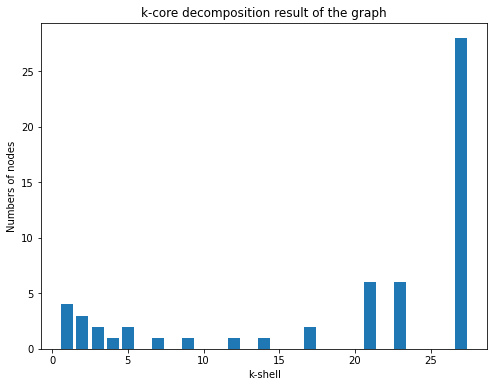

In [21]:
# kcore decomposition
k_core_graph = k_core_decomposition(G.copy())
print('The k-core decomposition result is:', k_core_graph)
data = {k: len(v) for k, v in k_core_graph.items()}
plt.figure(figsize=(8, 6))
plt.title('k-core decomposition result of the graph')
plt.xlabel('k-shell')
plt.ylabel('Numbers of nodes')
plt.bar(data.keys(), data.values())

[<Color red>, <Color #f42900>, <Color #ea4e00>, <Color #df7000>, <Color #d58e00>, <Color #caa800>, <Color #bfbf00>, <Color #97b500>, <Color #72aa00>, <Color #50a000>, <Color #329500>, <Color #178b00>, <Color green>]


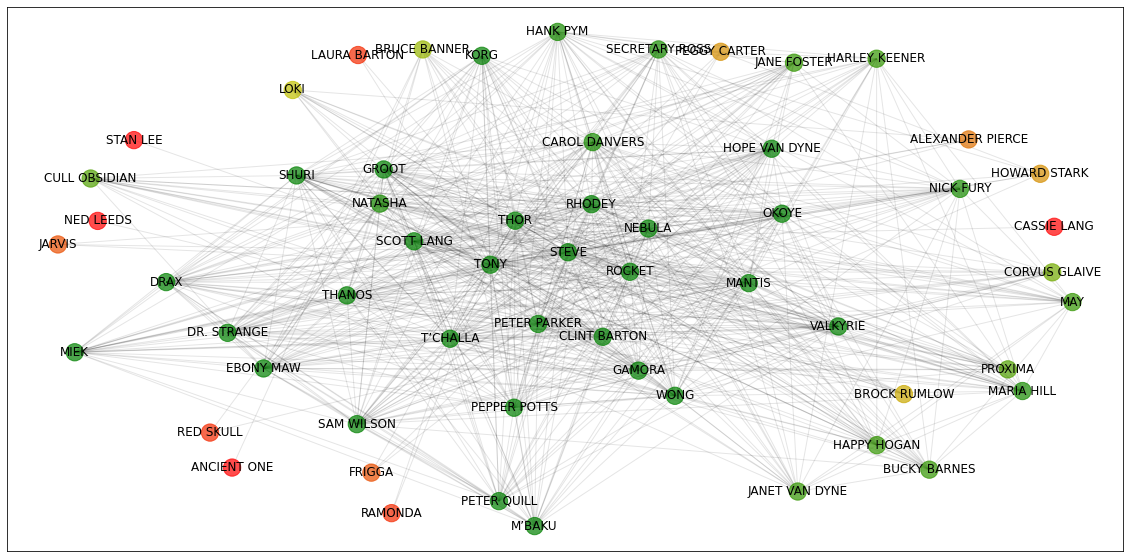

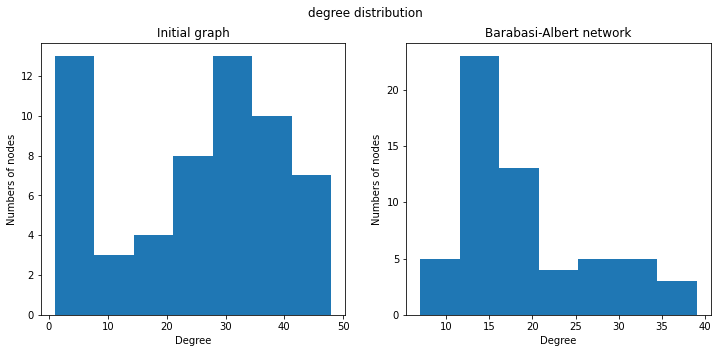

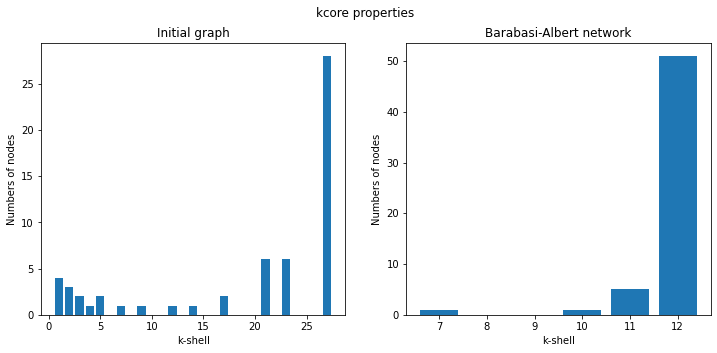

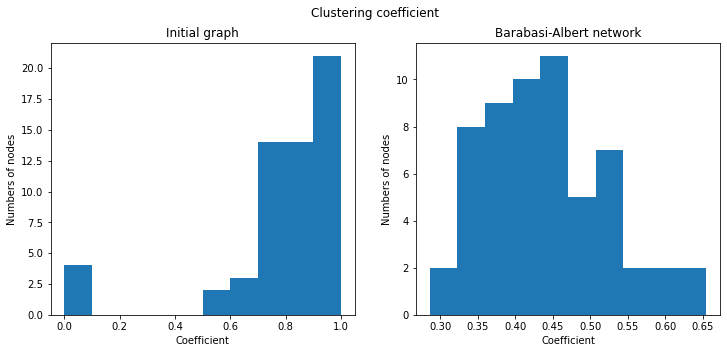

In [31]:
# kcore decomposition
k_core_graph = k_core_decomposition(G.copy())
color_lst= []
color_dict = {key:"" for key in k_core_graph}

c1 = Color("red")
c2 = Color("green")
gradient = list(c1.range_to(c2, 13))
print(gradient)

for n in gradient:
    color_lst.append(str(n))
c = 0
for key in color_dict.keys():
    color_dict[key] = color_lst[c]
    c+=1

color_map = []

for node in G:
    for i in k_core_graph.keys():
        if node in k_core_graph[i]:
            color_map.append(color_dict[i])
            
plt.figure(figsize = (20,10))
nx.draw_networkx_edges(G, pos, alpha=0.1)
nx.draw_networkx_nodes(G,pos,node_color = color_map, alpha = 0.7)
nx.draw_networkx_labels(G, pos)
plt.savefig(".\k_shell")
plt.show()

#Barabasi-Albert network
size = len(G.nodes())
average_degree = int(G.number_of_edges()/size)
barabasi_graph = nx.barabasi_albert_graph(size, average_degree)
k_core_with_barabasi_graph = k_core_decomposition(barabasi_graph.copy())

# display degree distribution for both graph to make comparison
fig1, axes1 = plt.subplots(1, 2, figsize=(12,5))
axes_titles = ["Initial graph", "Barabasi-Albert network"]
graphs = [G.copy(), barabasi_graph.copy()]
fig1.suptitle('degree distribution')
#fig1.text(0.04, 0.5, 'Numbers of nodes', va='center', rotation='vertical')

for i, ax in enumerate(axes1):
    data = {k: v for k, v in graphs[i].degree()}
    ax.hist(data.values(), bins="auto")
    ax.set_ylabel('Numbers of nodes')
    ax.set_title(axes_titles[i])
    ax.set_xlabel('Degree')

#k_shell comparison
fig2, axes2 = plt.subplots(1, 2, figsize=(12,5))
fig2.suptitle('kcore properties')
#fig2.text(0.5, 0.04, 'k_shell', ha='center')
#fig2.text(0.04, 0.5, 'Numbers of nodes', va='center', rotation='vertical')
k_cores_outputs = [k_core_graph, k_core_with_barabasi_graph]
for i, ax in enumerate(axes2):
    data = {k: len(v) for k, v in k_cores_outputs[i].items()}
    ax.set_title(axes_titles[i])
    ax.set_xlabel('k-shell')
    ax.set_ylabel('Numbers of nodes')
    ax.bar(data.keys(), data.values())
    
# Clustering coefficient
fig3, axes3 = plt.subplots(1, 2, figsize=(12,5))
fig3.suptitle('Clustering coefficient')
for i, ax in enumerate(axes3):    
    ax.set_title(axes_titles[i])
    ax.set_xlabel('Coefficient')
    ax.set_ylabel('Numbers of nodes')
    ax.hist(nx.clustering(graphs[i]).values())

In [32]:
# Compute the degree assortativity for the barabasi_graph
r = nx.degree_assortativity_coefficient(barabasi_graph, weight=None)
print("The assortativity of the preferential attachement network is: {}".format(round(r, 3)))

The assortativity of the preferential attachement network is: -0.149


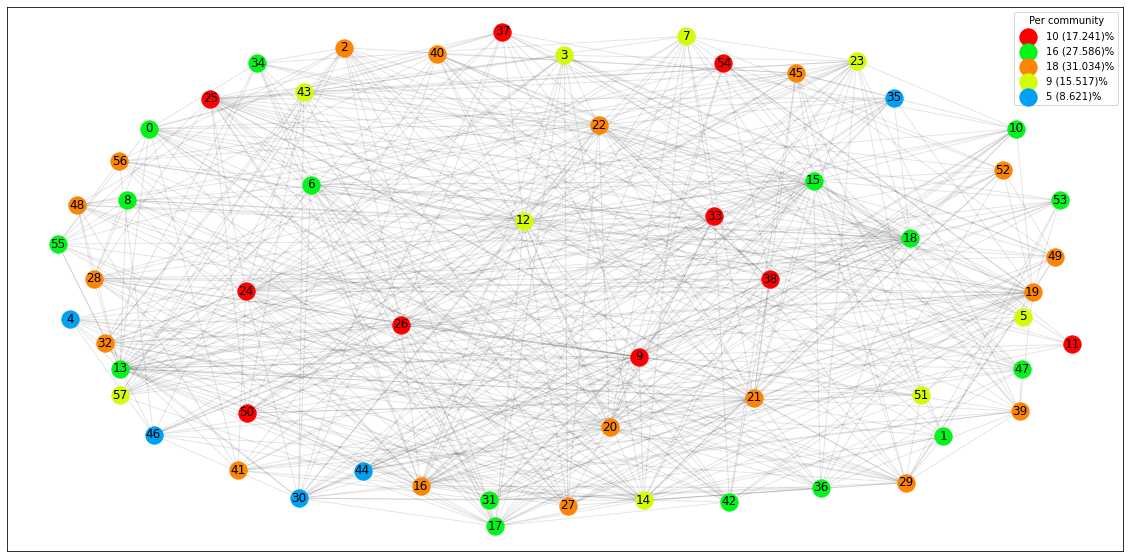

In [33]:
# community detection on barabasi_graph
communities_detection(barabasi_graph)

In [26]:
# Influence Maximization Problem

# Simulate the spread process using Independent Cascade Model over the graph
def spread_process(graph, A0, probability=.25, max_iter=500):
    """
    Input: graph object, set of seed nodes, propagation probability and the 
            number of simulations
    Output: average number of nodes activated by the set of seed nodes
    """
    evolution_spread = []
    number_spread = []
    for i in range(max_iter):
        active, new_active = A0[:], A0[:]
        np.random.seed(i)
        while new_active:
            # For each newly activated nodes ...
            new_actived_nodes = []
            for node in new_active:
                # ... Determine neighbors that become activated ...
                neighbors = [n for n in graph.neighbors(node)]
                success = np.random.uniform(0, 1, len(neighbors)) < probability
                new_actived_nodes += list(np.extract(success, neighbors))
            new_active = list(set(new_actived_nodes) - set(active))
            #... add the newly activated nodes that doesn't exist in the final 
            # list of activated nodes
            active += new_active
            
            evolution_spread.append(len(active))
    
        number_spread.append(len(active))
        
    return np.mean(number_spread), evolution_spread
    
    
# greedy algorithm: find the k nodes with the largest spread using the ICM
def greedy_algorithm(graph, percentage_k=0.05, probability=.1, max_iter=10):
    """
    Input:  graph object, propagation probability and the 
            number of simulations            
    Output: optimal seed set
    """
    k = round(percentage_k*graph.number_of_nodes()) #seed sets size
    A0 = []
    
    
    for _ in range(k):
        best_node = None
        best_spread = -np.inf
        
        for node in set(graph.nodes()) - set(A0):
            # Get a spread
            A = A0 + [node]
            
            if A and True in [graph.has_edge(node, a) for a in A] or len(A) == 1:            
                average_nodes_spread, evolution = spread_process(graph, A, probability, max_iter)
                # Get the best average number of nodes activated by the set of seed nodes 
                if average_nodes_spread > best_spread:
                    best_spread, best_node = average_nodes_spread, node
            
            
        A0.append(best_node)
        
    return A0



In [27]:
A0 = greedy_algorithm(G)
print("The set of seeds :", str(A0))

The set of seeds : ['SAM WILSON', 'HOPE VAN DYNE', 'MANTIS']


In [28]:
# ICM using nodes of highest degree
def max_degree(G,k):
    maxi = [('',0)]*k
    for d in G.degree():
        for i in range(len(maxi)):
            if d[1] > maxi[i][1]:
                maxi[i] = d
                break
    lst = []
    for n in maxi:
        lst.append(n[0])
    return lst

highest_deg = max_degree(G,3)
mean_one ,spreads_highest = spread_process(G,highest_deg, max_iter = 1)
print(spreads_highest)
  
# ICM using random set
random_nodes = random.sample(list(G.nodes()), 3)
mean_two, spreads_random = spread_process(G,random_nodes, max_iter = 1)
print(spreads_random)

#ICM using A0 from greedy algorithm

mean_three, spreads_greedy = spread_process(G,A0, max_iter = 1)
print(spreads_greedy)

[29, 52, 53, 53]
[12, 47, 53, 54, 54]
[26, 46, 50, 50]


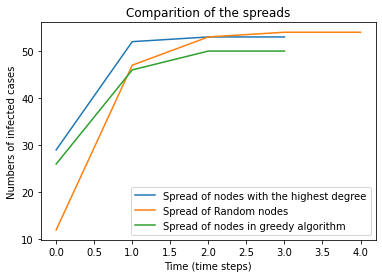

In [34]:
plt.plot(spreads_highest, label = "Spread of nodes with the highest degree")
plt.plot(spreads_random, label = "Spread of Random nodes")
plt.plot(spreads_greedy, label = "Spread of nodes in greedy algorithm")
plt.title("Comparition of the spreads")
plt.ylabel("Numbers of infected cases")
plt.xlabel("Time (time steps)")
plt.legend()
plt.show()

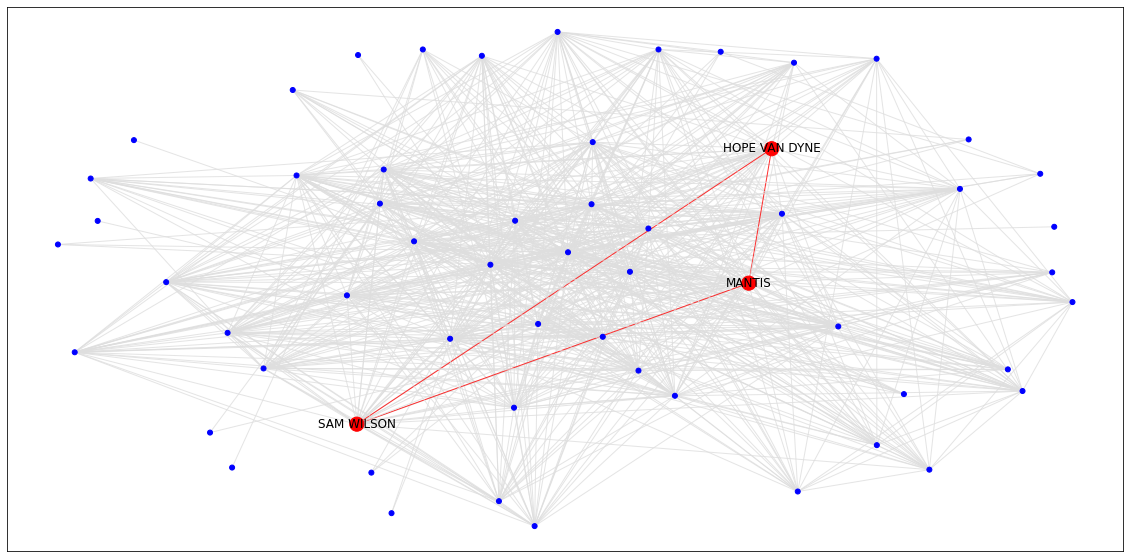

In [30]:
color_map = []
edgecolors = []
nodesizes = []
labels = {}

for node in G.nodes():
    if node not in A0:
        color_map.append('blue')
        nodesizes.append(25)
        labels[node] = ''
    else: 
        color_map.append('#ff0000')    
        labels[node] = node
        nodesizes.append(200)

for edge in G.edges():
    if all(x in A0 for x in list(edge)):
        edgecolors.append("green")
    else:
        edgecolors.append('black')

fig = plt.figure(figsize=(20, 10))

pos = nx.spring_layout(G, seed=4321, k=3)
nx.draw_networkx_nodes(G, pos=pos, node_color=color_map, node_size=nodesizes)
nx.draw_networkx_labels(G, pos=pos, labels=labels)
nx.draw_networkx_edges(G, pos, edge_color=["#ff0000" if all(x in A0 for x in list(e)) else "#dedede" for e in G.edges], alpha=0.8)